# Hierarchical Clustering of Wine  (unsupervised learning )

In [1]:
# getting the necessary libraries..
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [2]:
#get txt file from directory
path="wine.txt"
cols=['Variety','Alcohol',' Malic acid','Ash','Alcalinity of ash ', 'Magnesium',' Total phenols', 'Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
wine=pd.read_csv(path,names=cols)
wine.head(n=6) #display

,Variety,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [3]:
#rows and columns display
print('shape =', wine.shape)
#display class nos in variety
print('\n',wine['Variety'].unique())

shape = (178, 14)

 [1 2 3]


In [4]:
#checking for missing values in the dataset
wine.isna().sum()

Variety                         0
Alcohol                         0
 Malic acid                     0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
 Total phenols                  0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [5]:
#info of df
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Variety                       178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2    Malic acid                   178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6    Total phenols                178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [6]:
#statistics of df
wine.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Variety,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity of ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [7]:
#rename columns
wine=wine.rename(columns={"Nonflavanoid phenols": "Nonflavanoid", "OD280/OD315 of diluted wines": "diluted_wines"})

In [8]:
#select and drop column 'Variety'
wine.drop('Variety',axis=1,inplace=True)

In [ ]:
#explore the df and check for outliers
plt.figure(figsize=(20,20))
sns.boxplot(data=wine)
plt.show()#display dist.

In [10]:
#normalize the df
from sklearn.preprocessing import MinMaxScaler
data = wine.copy()
scaler = MinMaxScaler()
wine_scaled=scaler.fit_transform(data)


In [11]:
#display df of the scaled data
wine_scaled=pd.DataFrame(wine_scaled)
wine_scaled.columns=['Alcohol',' Malic acid','Ash','Alcalinity of ash ', 'Magnesium',' Total phenols', 'Flavanoids','Nonflavanoid','Proanthocyanins','Color intensity','Hue',' diluted wines','Proline']
wine_scaled.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


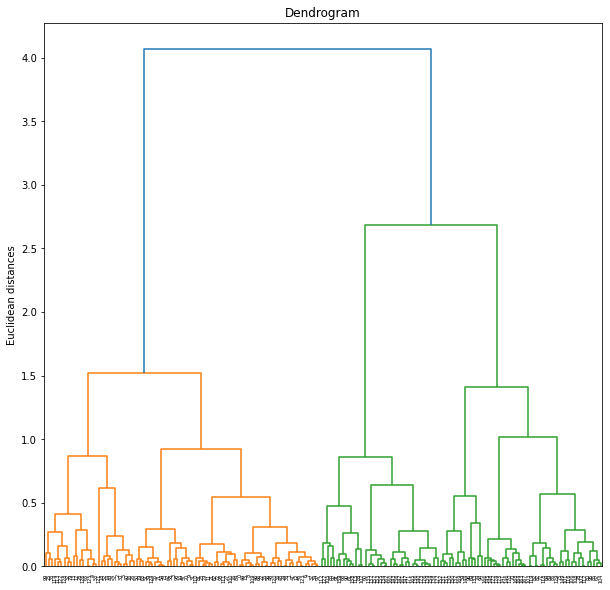

In [12]:
#creating dendogram
plt.figure(figsize=(10, 10))
sample_data=wine_scaled[['Flavanoids','Nonflavanoid']].values
dendrogram = sch.dendrogram(sch.linkage(sample_data, method = 'ward'))#wine_scal_fla_no
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()

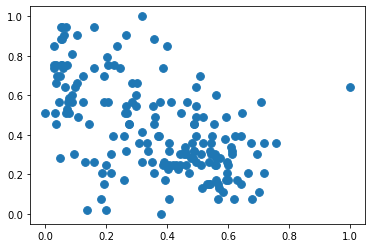

In [13]:
#visualizing the sample_data
_=plt.scatter(wine_scaled.Flavanoids, wine_scaled.Nonflavanoid, s=60)

In [14]:
#initiating clustering
hc=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hc_labl=hc.fit_predict(sample_data)

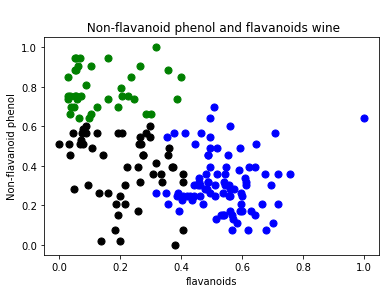

In [15]:
#plotting and displaying the scatter_plot
plt.scatter( sample_data[hc_labl==0,0], sample_data[hc_labl==0,1], s=50,c='b') 
plt.scatter( sample_data[hc_labl==1,0], sample_data[hc_labl==1,1], s=50, c='k') 
_=plt.scatter(sample_data[hc_labl==2,0], sample_data[hc_labl==2,1], s=50, c='g')
plt.title ('\n Non-flavanoid phenol and flavanoids wine') #title
plt.ylabel('Non-flavanoid phenol') #y-axis labellng
plt.xlabel('flavanoids')#x-axis labelling
plt.show()

# 